### Paths

In [1]:
# Directories

# Testing img after splitting into open / closed dir
test_image_path = '/home/codewizard/Documents/Jupyter/datasets/closed_eye/s0001_00006_0_0_0_0_0_01.png'

# Dir which using to separate open / closed eyes
input_directory = "/home/codewizard/Documents/Jupyter/datasets/mrlEyes_2018_01"
output_directory_closed = "/home/codewizard/Documents/Jupyter/datasets/closed_eye"
output_directory_open = "/home/codewizard/Documents/Jupyter/datasets/open_eye"

# Imports

"""
The next line of code attempts to import several Python libraries commonly used in machine learning and computer vision tasks. If any of the libraries is not already installed, it installs the library using the `pip` package manager and then imports it.

1. TensorFlow Import:
   - Attempts to import TensorFlow for machine learning tasks.
   - If TensorFlow is not installed, it installs it using `pip install tensorflow` and then imports it.

2. OpenCV (cv2) Import:
   - Attempts to import the OpenCV library for computer vision tasks.
   - If OpenCV is not installed, it installs it using `pip install opencv-python` and then imports it.

3. Matplotlib Import:
   - Attempts to import Matplotlib for data visualization.
   - If Matplotlib is not installed, it installs it using `pip install matplotlib` and then imports it.

4. NumPy Import:
   - Attempts to import NumPy for numerical computing.
   - If NumPy is not installed, it installs it using `pip install numpy` and then imports it.

Note:
- The code uses a try-except block to handle ImportError, which occurs when the respective library is not found.
- These libraries are commonly used in data preprocessing, model building, and visualization in machine learning and computer vision projects.
- The code ensures that the required libraries are installed, making it easier to run the subsequent code that relies on these libraries.
"""

In [2]:
try:
    import tensorflow as tf
except ImportError:
    !pip install tensorflow
    import tensorflow as tf

try:
    import cv2
except ImportError:
    !pip install opencv-python
    import cv2

try:
    import matplotlib.pyplot as plt
except ImportError:
    !pip install matplotlib
    import matplotlib.pyplot as plt

try:
    from sklearn.preprocessing import MinMaxScaler
except ImportError:
    !pip install scikit-learn
    from sklearn.preprocessing import MinMaxScaler

try:
    import matplotlib.pyplot as plt
except ImportError:
    !pip install matplotlib
    import matplotlib.pyplot as plt

try:
    from scikeras.wrappers import KerasClassifier
except ImportError:
    !pip install scikeras
    from scikeras.wrappers import KerasClassifier


from PIL import Image
import os
import pickle
import datetime
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import History

2024-02-20 20:05:42.286693: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 20:05:42.286782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 20:05:42.657785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-20 20:05:43.695932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-20 20:05:51.869441: W tensorflow/compiler/tf2tens

# 1. Split Images

## <b>process_images</b> Function Description:

</br>

process_images(input_dir, output_dir_closed, output_dir_open)

Description:
This function processes images in a dataset organized into subfolders based on the given directory structure.
It copies images with a closed eye (eye state = 0) to the 'closed_eye' folder and images with an open eye (eye state = 1) to the 'open_eye' folder.

Parameters:
- input_dir (str): The path to the dataset containing subfolders with images. Each subfolder represents a subject.
- output_dir_closed (str): The path to the folder where images with a closed eye will be copied.
- output_dir_open (str): The path to the folder where images with an open eye will be copied.

Note:
- The function assumes a specific naming convention for image files within each subfolder, extracting eye state information from the filename.
- The 'closed_eye' and 'open_eye' folders will be created if they don't already exist.
- The function is designed for use in a Jupyter notebook environment and handles the '~' character in paths.

Example Usage:
```python
process_images("~/Documents/Jupyter/datasets/mrlEyes_2018_01",
               "~/Documents/Jupyter/datasets/closed_eye",
               "~/Documents/Jupyter/datasets/open_eye")


In [11]:
import os
import shutil

def process_images(input_dir, output_dir_closed, output_dir_open):
    # Create absolute paths for input and output directories
    input_dir = os.path.expanduser(input_dir)  
    output_dir_closed = os.path.expanduser(output_dir_closed)
    output_dir_open = os.path.expanduser(output_dir_open)

    # Create output directories if they don't exist
    os.makedirs(output_dir_closed, exist_ok=True)
    os.makedirs(output_dir_open, exist_ok=True)

    # Iterate through subfolders
    for subfolder in os.listdir(input_dir):
        subfolder_path = os.path.join(input_dir, subfolder)

        if os.path.isdir(subfolder_path):
            # Iterate through images in the subfolder
            for image_filename in os.listdir(subfolder_path):
                image_path = os.path.join(subfolder_path, image_filename)

                # Extract information from the image filename
                _, _, _, _, eye_state, _, _, _ = image_filename.split('_')

                # Determine the output folder based on the eye state
                output_folder = output_dir_closed if eye_state == '0' else output_dir_open

                # Copy the image to the appropriate output folder
                shutil.copy(image_path, os.path.join(output_folder, image_filename))

####  Set your timer: Time elapsed: 0:10:05

In [12]:
start_timer = datetime.datetime.now()

# Process the images
process_images(input_directory, output_directory_closed, output_directory_open)


In [13]:
stop_timer = datetime.datetime.now()

# Calculate the difference between start_timer and stop_timer
time_difference = stop_timer - start_timer

# Display the time difference
print('Time elapsed:', time_difference)

Time elapsed: 0:10:05.422940


# 2. Check images

### Lets check this image

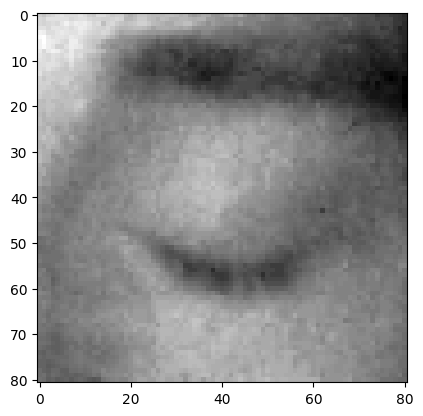

In [4]:
test_img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(test_img, cmap='gray')


As we know cv2 which I will use later on to work with images, <br>works with a grayscale image, and this is a reason why:   <br>grayscale images have only one channel, representing the  <br>intensity of each pixel. This reduces the complexity of the data  <br>compared to color images, which have three channels (Red,  <br>Green, and Blue). also, grayscale images require less storage  <br>space and bandwidth than color images, making them more  <br>suitable for situations where memory or transmission resources are limited.

In [5]:
# Use cv2.IMREAD_UNCHANGED to check if the image has an alpha channel
img = cv2.imread(test_image_path, cv2.IMREAD_UNCHANGED)  

# Check if the image is in grayscale
if len(img.shape) == 2 or (len(img.shape) == 3 and img.shape[2] == 1):
    print("The image is in grayscale.")
else:
    print("The image is not in grayscale.")


The image is in grayscale.


## What is an alpha channel

besides having 3 channels (with the red, green, and blue (RGB)<br>in computer graphics uses an additional channel that stores <br>transparency information for each pixel in an image. In the <br>context of the cv2.imread() function in the OpenCV library, the<br> cv2.IMREAD_UNCHANGED flag can be used to read the alpha <br>channel along with the color channels of the image. The alpha <br>channel is represented as a single channel, typically ranging from 0 to 255, with <br>0 indicating full transparency (completely invisible) and 255 indicating complete opacity (fully opaque).<br>https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80aeddd67043ed0df14f9d9a4e66d2b0708

## Example

In [6]:
import cv2

# Read an image
img_with_alpha = cv2.imread(test_image_path, cv2.IMREAD_UNCHANGED)

# Check if the image has an alpha channel
if img_with_alpha.shape[-1] == 4:
    print("The image has an alpha channel.")
else:
    print("The image does not have an alpha channel.")


The image does not have an alpha channel.


# Resize


Many convolutional neural networks (CNNs) prefer square images. <br>Common choices include 224x224, 256x256, or 299x299 pixels. <br>same time using image sizes that are powers of <br>2, for example, sizes such as 128x128, 256x256, and 512x512 is <br>often convenient for GPU processing. <br>Some pre-trained models or architectures may have specific <br>input size requirements. For example, models trained on <br>ImageNet often expect input images of size 224x224. I will be <br>using one of that kinds of models, this is why I need to convert <br>all images to a needed size. <br>Larger image sizes can reduce the batch size that fits into GPU <br>memory whereas smaller batch sizes can affect training stability <br>and convergence. For instance, object detection or segmentation <br>tasks may require larger input sizes, like in my case 224x224 will <br>be perfect for that.

### Check Current Size

In [7]:
img_with_alpha.shape

(81, 81)

### Convert to target size

In [19]:
from concurrent.futures import ThreadPoolExecutor
from PIL import Image
import os

def resize_image(img_path, output_path, target_size=(224, 224)):
    try:
        with Image.open(img_path) as img:
            resized_img = img.resize(target_size)
            resized_img.save(output_path)
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")

def process_images_in_parallel(input_dir, output_dir, target_size=(224, 224), num_workers=4):
    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        for root, _, files in os.walk(input_dir):
            for file in files:
                img_path = os.path.join(root, file)
                output_path = os.path.join(output_dir, file)
                executor.submit(resize_image, img_path, output_path, target_size)

# Begin the process for Closed Eyes
input_directory = '/home/codewizard/Documents/Jupyter/datasets/closed_eye'
output_directory = '/home/codewizard/Documents/Jupyter/datasets/closed'
# process_images_in_parallel(input_directory, output_directory)

# Begin the process for Open Eyes
input_directory = '/home/codewizard/Documents/Jupyter/datasets/open_eye'
output_directory = '/home/codewizard/Documents/Jupyter/datasets/open'
# process_images_in_parallel(input_directory, output_directory)

### Check After Resizing

In [8]:
# Read an image
test_image_path_2 = '/home/codewizard/Documents/Jupyter/datasets/open/s0014_08486_0_0_1_1_1_02.png'
img_with_alpha = cv2.imread(test_image_path_2, cv2.IMREAD_UNCHANGED)
img_with_alpha.shape

(224, 224)

# TO-DO: Work on Dataset

# Create a Dataset for Training

In [9]:
"""
def create_dataset():
    training_data = []
    classes = ['open_eye', 'closed_eye']
    data_directory = '/home/codewizard/Documents/Jupyter/datasets'

    for class_indx, category in enumerate(classes):
        path = os.path.join(data_directory, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            processed_img = process_image(img_path)
            if processed_img is not None:
                training_data.append([processed_img, class_indx])

    return training_data
"""

"\ndef create_dataset():\n    training_data = []\n    classes = ['open_eye', 'closed_eye']\n    data_directory = '/home/codewizard/Documents/Jupyter/datasets'\n\n    for class_indx, category in enumerate(classes):\n        path = os.path.join(data_directory, category)\n        for img in os.listdir(path):\n            img_path = os.path.join(path, img)\n            processed_img = process_image(img_path)\n            if processed_img is not None:\n                training_data.append([processed_img, class_indx])\n\n    return training_data\n"

In [10]:
"""
start_timer = datetime.datetime.now()


import cv2
import os
import numpy as np

def process_image(img_path, target_size=(224, 224)):
    try:
        # Read the image using cv2
        img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)

        # Resize the image to the target size
        new_format_img = cv2.resize(img_array, target_size)

        return new_format_img
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        return None

def create_dataset():
    training_data = []
    classes = ['open_eye', 'closed_eye']
    data_directory = '/home/codewizard/Documents/Jupyter/datasets'
    batch_size = 5
    target_size = (224, 224)

    for class_indx, category in enumerate(classes):
        path = os.path.join(data_directory, category)
        img_list = os.listdir(path)

        for i in range(0, len(img_list), batch_size):
            batch_img_paths = [os.path.join(path, img) for img in img_list[i:i+batch_size]]
            batch_processed_imgs = [process_image(img_path, target_size) for img_path in batch_img_paths]
            
            # Filter out None values (images that were skipped)
            batch_processed_imgs = [img for img in batch_processed_imgs if img is not None]
            
            training_data.extend([[img, class_indx] for img in batch_processed_imgs])

    return training_data

# Create the dataset
dataset = create_dataset()
print(f"Number of images in the dataset: {len(dataset)}")


stop_timer = datetime.datetime.now()

# Calculate the difference between start_timer and stop_timer
time_difference = stop_timer - start_timer

# Display the time difference
print('Time elapsed:', time_difference)
"""

'\nstart_timer = datetime.datetime.now()\n\n\nimport cv2\nimport os\nimport numpy as np\n\ndef process_image(img_path, target_size=(224, 224)):\n    try:\n        # Read the image using cv2\n        img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)\n\n        # Resize the image to the target size\n        new_format_img = cv2.resize(img_array, target_size)\n\n        return new_format_img\n    except Exception as e:\n        print(f"Error processing image {img_path}: {e}")\n        return None\n\ndef create_dataset():\n    training_data = []\n    classes = [\'open_eye\', \'closed_eye\']\n    data_directory = \'/home/codewizard/Documents/Jupyter/datasets\'\n    batch_size = 5\n    target_size = (224, 224)\n\n    for class_indx, category in enumerate(classes):\n        path = os.path.join(data_directory, category)\n        img_list = os.listdir(path)\n\n        for i in range(0, len(img_list), batch_size):\n            batch_img_paths = [os.path.join(path, img) for img in img_list[i:i+b

In [11]:
import os
import cv2

def create_dataset(images_dir):
    """
    Load images from a directory and create training data.

    Args:
    - images_dir (str): Path to the directory containing images.

    Returns:
    - training_data (list): List of image arrays and their corresponding class labels.
    """
    training_data = []  # Initialize an empty list to store training data
    classes = ['open', 'closed']  # Define class labels

    for category in classes:  # Iterate over each class label
        path = os.path.join(images_dir, category)  # Get the path to the directory for the current class
        class_num = classes.index(category)  # Get the numerical label for the current class

        for img in os.listdir(path):  # Iterate over each image file in the directory
            try:
                # Read the image as a grayscale array using OpenCV
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                # Append the image array and its corresponding class label to the training data list
                training_data.append([img_array, class_num])
            except Exception as e:
                print(e)  # Print any errors that occur during image loading

    return training_data  # Return the training data list


In [27]:
working_ds = create_dataset('/home/codewizard/Documents/Jupyter/datasets/')

In [28]:
print(len(working_ds))

84898


In [29]:
import pandas as pd
wdf = pd.DataFrame(working_ds)
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84898 entries, 0 to 84897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       84898 non-null  object
 1   1       84898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [30]:
wdf.head()

,0,1
0,"[[194, 194, 194, 195, 195, 195, 195, 194, 194,...",0
1,"[[49, 49, 49, 50, 50, 50, 51, 51, 51, 51, 52, ...",0
2,"[[80, 80, 79, 79, 78, 78, 78, 78, 78, 79, 80, ...",0
3,"[[62, 62, 63, 63, 64, 65, 65, 66, 67, 68, 68, ...",0
4,"[[132, 132, 132, 133, 133, 134, 134, 134, 135,...",0


# Shuffle Data

In [31]:
import random

# Shuffle my working Dataset
random.shuffle(working_ds)

#  Save Dataset

Saving a dataset as a pickle file allows you to store not only the data but also <br>the structure and relationships within the dataset.<br> This is particularly useful when dealing with complex data<br> structures, nested objects, or custom classes also, pickle files<br> are binary types, which means that they are more space-efficient<br> than storing the data in a human-readable format like JSON or CSV.<br> Binary formats are also faster to read and write.
<br><i>https://docs.python.org/3/library/pickle.html</i>

In [22]:
# save dataset as .pkl type

with open('training_data.pkl', 'wb') as f:
    pickle.dump(working_ds, f)

NameError: name 'working_ds' is not defined

===========================================================================================================================================

# Stage 2

===========================================================================================================================================

# Load Dataset

In [6]:

# Load dataset from pickle file

with open('training_data.pkl', 'rb') as f:
    training_dataset = pickle.load(f)

EOFError: Ran out of input

In [34]:
print(f"The size of the dataset: {len(training_dataset)}")

The size of the dataset: 84898


## Set subset_size

Benefits of Small Datasets:

    Faster Training: Models trained on small datasets typically converge faster during training since there are fewer examples to process.
    Less Resource Intensive: Training models on small datasets requires fewer computational resources (e.g., memory, processing power), making it more feasible for systems with limited resources.
    Ease of Experimentation: Working with small datasets allows for rapid prototyping and experimentation with different models, hyperparameters, and techniques.
    Lower Data Collection Costs: Collecting and annotating small datasets is often less costly and time-consuming compared to large-scale data collection efforts.

Benefits of Large Datasets:

    Improved Generalization: Models trained on large datasets tend to generalize better to unseen data, as they have been exposed to a more diverse range of examples, scenarios, and variations.
    Higher Performance: Large datasets provide more information for models to learn from, enabling them to capture complex patterns and relationships in the data, leading to higher predictive performance.
    Robustness to Noise: Large datasets help mitigate the effects of noise and outliers present in the data, resulting in more robust and reliable models.
    Transferability: Models trained on large datasets often exhibit better transfer learning capabilities, allowing them to be adapted to related tasks or domains with minimal additional training.

In [38]:
subset_size = 20000
subset_training_dataset = training_dataset[:subset_size]

#  Labels & Features

### Reshape

Reshaping grayscale images to RGB format before training is necessary if your model expects input images to have three color channels (RGB) but your dataset consists of grayscale images. Here are a few reasons why you might need to do this:

    Model Compatibility: Many deep learning models, especially those designed for computer vision tasks, are designed to work with RGB images. If your model architecture expects input images to have three color channels, you need to convert grayscale images to RGB format to ensure compatibility.

    Feature Representation: Converting grayscale images to RGB format ensures that the model can learn meaningful representations from the input data. While grayscale images contain valuable information, representing them in RGB format provides additional color information that can potentially improve the model's performance.

    Preprocessing Consistency: Preprocessing the data consistently ensures that the model learns from a standardized input format. By converting all images to RGB format, you maintain consistency in the input data, making it easier to train and evaluate the model.

    Data Augmentation: If you plan to use data augmentation techniques during training, such as rotation, flipping, or color jittering, having RGB images allows you to apply these transformations more effectively. Data augmentation can help improve the model's robustness and generalization performance.

In [3]:
X = []
y = []

for features, label in subset_training_dataset:
    # Reshape grayscale images to (224, 224, 3)
    if len(features.shape) == 2:
        features = np.expand_dims(features, axis=-1)  # Add a new axis for the third dimension
        features = np.repeat(features, 3, axis=-1)  # Repeat the grayscale values for all three channels
    X.append(features)
    y.append(label)

X = np.array(X)  # Convert to NumPy array
print("Shape of X before reshaping:", X.shape)

# Reshape X to (-1, 224, 224, 3)
X = X.reshape(-1, 224, 224, 3)
print("Shape of X after reshaping:", X.shape)

NameError: name 'subset_training_dataset' is not defined

In [40]:
X.shape

(2000, 224, 224, 3)

##  Normalize

Normalizing the data is a crucial preprocessing step in machine learning, especially for deep learning models, for several reasons:

    Improves Convergence: Normalizing the data to a similar scale helps the optimization algorithm converge faster during training. When features have vastly different scales, the optimization process can become slower, as the learning rate may need to be adjusted to accommodate the differences. Normalizing the data mitigates this issue and ensures smoother and faster convergence.

    Enhances Model Stability: Normalization makes the optimization process more stable and robust. It reduces the chance of gradient explosion or vanishing, especially in deep neural networks, where gradients can propagate through many layers. By keeping the input values within a certain range, normalization prevents extreme values from affecting the training process disproportionately.

    Facilitates Learning: Normalized data can facilitate learning by providing a more consistent and interpretable representation of the input features. It ensures that each feature contributes proportionally to the model's decision-making process, preventing certain features from dominating the learning process due to their larger scales.

    Improves Generalization: Normalization can help improve the generalization performance of the model by preventing overfitting. By ensuring that the model learns patterns and relationships that are intrinsic to the data distribution, rather than being influenced by the scale of the features, normalization encourages the model to learn more meaningful and transferable representations.

    Facilitates Comparison: Normalizing the data allows for fair comparison between different features or models. It ensures that the performance metrics are not biased by the scale of the input features, making it easier to interpret and compare the effectiveness of different approaches.

Normalizing the data by dividing each feature by the maximum value (e.g., X = X / 255.0) is a common and effective way of scaling the features to a range between 0 and 1, especially for image data where pixel values typically range from 0 to 255.

However, if you're using scikit-learn (sklearn), you can utilize its MinMaxScaler preprocessing module, which provides a more flexible and consistent approach to normalization. Here's how you can use MinMaxScaler to normalize your data:

In [41]:
X = X/255.0

### Doing with sklearn processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reshape X to 2D array (if needed)
X_2d = X.reshape(-1, 224*224*3)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to X and transform X
X_normalized = scaler.fit_transform(X_2d)

# Reshape X back to its original shape
X_normalized = X_normalized.reshape(-1, 224, 224, 3)
X = X_normalized

# DO U NEED IT ?????

### Make sure Features and Labels is in np.array 

Using NumPy arrays for features and labels in machine learning and deep learning tasks offers several advantages:

    Efficient Computation: NumPy arrays are optimized for numerical computations and provide efficient storage and manipulation of large datasets. Operations such as element-wise arithmetic operations, matrix multiplication, and broadcasting are significantly faster with NumPy arrays compared to Python lists.

    Compatibility with Libraries: Many machine learning and deep learning libraries, including TensorFlow, PyTorch, and scikit-learn, expect input data to be in the form of NumPy arrays. Using NumPy arrays ensures compatibility with these libraries, allowing you to seamlessly integrate your data preprocessing and model training pipelines.

    Uniform Data Representation: NumPy arrays provide a uniform and standardized way to represent numerical data, regardless of its dimensionality or shape. This uniformity simplifies data processing and manipulation tasks, such as reshaping, slicing, and indexing, making it easier to work with complex datasets.

    Memory Efficiency: NumPy arrays are more memory-efficient compared to Python lists, especially for large datasets. They store data in a contiguous block of memory, which reduces memory overhead and enables more efficient memory allocation and access.

    Vectorized Operations: NumPy supports vectorized operations, allowing you to perform computations on entire arrays without the need for explicit looping. This enables concise and expressive code, simplifying the implementation of complex algorithms and mathematical operations.

X = X_normalized
Y = np.array(y)

# DO U NEED IT ?????

### To avoid of repeating the processes again and again, store Features and Labels in .pickle files

In [49]:
# save dataset as .pkl type

print (f'Remeber our data size is: {subset_size}')

with open('X_features.pkl', 'wb') as f:
    pickle.dump(X, f)

# save dataset as .pkl type

with open('y_labels.pkl', 'wb') as f:
    pickle.dump(y, f)

Remeber our data size is: 2000


===========================================================================================================================================

# Stage 3

===========================================================================================================================================

## Read Features and labels

In [3]:
# Load dataset from pickle file

with open('X_features.pkl', 'rb') as f:
    X = pickle.load(f)

with open('y_labels.pkl', 'rb') as f:
    y = pickle.load(f)

## Training & Learning

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

## Pick the Model

###  Reference:
    - [MobileNets: Efficient Convolutional Neural Networks
       for Mobile Vision Applications](
        https://arxiv.org/abs/1704.04861)

In [5]:
# Display documentation for MobileNet
help(tf.keras.applications.mobilenet.MobileNet)

Help on function MobileNet in module keras.src.applications.mobilenet:

MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=0.001, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000, classifier_activation='softmax', **kwargs)
    Instantiates the MobileNet architecture.
    
    Reference:
    - [MobileNets: Efficient Convolutional Neural Networks
       for Mobile Vision Applications](
        https://arxiv.org/abs/1704.04861)
    
    This function returns a Keras image classification model,
    optionally loaded with weights pre-trained on ImageNet.
    
    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).
    
    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).
    
    Note: each Keras Application expects a spec

In [6]:
model = tf.keras.applications.mobilenet.MobileNet()

### Check Model Summary

In [7]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [8]:
layer_data = model.layers[0].input
layer_data

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

This model input layer is :
<br>
_________________________________________________________________
 Layer (type)&emsp;&emsp;&emsp;&emsp;input_1 (InputLayer) <br>
 Output Shape&emsp;&emsp;&emsp;[(None, 224, 224, 3)]<br>
 Param #&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;0<br>
________________________________________________________________

In the case of MobileNet and many other CNNs used for image classification tasks, the input tensor shape is (None, height, width, channels), where:

    None indicates that the model can accept a variable batch size. During training or inference, you can feed the model batches of images, and the batch size can vary.
    height and width represent the dimensions of each input image. In this case, 224 indicates that the input images are expected to have a height and width of 224 pixels.
    channels represents the number of color channels in each image. For RGB images, there are three channels: one for red, one for green, and one for blue.

When you resize grayscale images to RGB, you are essentially converting each grayscale image, which originally has only one color channel, into an RGB image with three color channels. This is necessary to match the expected input format of the model, which requires input images to have three color channels.

The resizing from grayscale to RGB ensures that each input image conforms to the expected input shape (None, 224, 224, 3) required by the MobileNet model.

## Transfer Learninng

When using a pre-trained model such as MobileNet, it is often necessary to customize the output layers to suit specific tasks. The pre-trained MobileNet model is trained on the ImageNet dataset with 1000 classes. However, my task includes only 2 types of classes and these are open and closed eyes.

So once the MobileNet model is loaded, developers can add new layers on top of it to tailor it to their specific task. This process is known as transfer learning. In other words, I save the convolutional base of the pre-trained model (which received useful features from ImageNet). And then at the end, I change or add new layers according to the specific classification task that needs to be done.

I use the code below to fine-tune it for the binary classification task. This involves flattening the output, adding a dense layer with one neuron (for binary classification), and applying a sigmoid activation function to produce probabilities between 0 and 1.

In [9]:
# Remove last 4 layers
model_base_input = model.input
flatten_layer = layers.Flatten()(model.layers[-4].output)
dense_layer = layers.Dense(1)(flatten_layer)
final_output = layers.Activation('sigmoid')(dense_layer)

## Create New Model

 <i>model_base_input = model.layers[0].input </i><br>
 assigns the input tensor of the first layer of the model to the variable model_base_input. This input tensor represents the input data that will be fed into the neural network during inference or training.

In [10]:
model_base_input = model.layers[0].input



 * keras.Model: 
This is a constructor function provided by the Keras library to create a new model instance.

 * inputs = model_base_input: 
This specifies the input(s) of the new model. In this case, model_base_input represents the input tensor of the original model, and it will be used as the input for the new model.

 * outputs = final_output: 
This specifies the output(s) of the new model. final_output represents the output tensor of the final layer of the original model, and it will be used as the output for the new model.

In other words I create a new model with the same input(s) as the original model ( MobileNets ) but with a different output, which is stored in final_output.

In [11]:
# Create new model with modified architecture
new_model = tf.keras.Model(inputs=model_base_input, outputs=final_output)

### Representing the new version of the model

In [12]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

## Binary Classification (open/close) eye

<b>Arguments Break down:</b>

 * <i>loss='binary_crossentropy'</i><br>
This specifies the loss function to be used during training. In this case, it's binary cross-entropy, which is commonly used for binary classification problems where the output of the model is a probability distribution over two classes.<br>
source: https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy

 * <i>optimizer='adam'</i><br>
This specifies the optimizer algorithm to be used for training. Adam (Adaptive Moment Estimation) is a popular optimization algorithm known for its effectiveness and efficiency in training deep neural networks. It adapts the learning rate during training to speed up convergence and handle sparse gradients effectively.<br>
source: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

 * <i>metrics=['accuracy']</i><br>
This specifies the evaluation metric(s) to be used to monitor the performance of the model during training. Here, it's set to accuracy, which measures the proportion of correctly classified samples out of the total number of samples. It's a common metric for classification tasks and provides insight into how well the model is performing on the training data.<br>
source: https://www.tensorflow.org/api_docs/python/tf/compat/v1/metrics/accuracy

In [13]:
# Compile the model
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit the New Model

Reminding where comes X and Y.<br>
X = X_normalized<br>
Y = np.array(y)


    * X: This is the input data (features) for training the model.

    * Y: This is the target data (labels) corresponding to the input data X.

    * epochs: This specifies the number of times the entire dataset will be passed forward and backward through the neural network during training. In this case, the model will be trained for 1 epoch.

    * validation_split: This argument specifies the fraction of the training data to be used as validation data. In this case, 10% of the training data (X and Y) will be used for validation during training. The validation data is not used for training but is used to evaluate the model's performance on unseen data after each epoch.

In [14]:
Y = np.array(y)

In [18]:
from tensorflow.keras.callbacks import History

# Create an instance of the History callback
history = History()

# Train the model with the History callback
new_model.fit(X, Y, epochs=1, validation_split=0.1, callbacks=[history])

2024-02-19 20:27:44.954685: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1083801600 exceeds 10% of free system memory.


57/57 [==============================] - 92s 2s/step - loss: 0.0761 - accuracy: 0.9744 - val_loss: 0.1325 - val_accuracy: 0.9500


## Display Training Results

In [19]:
# Access the loss data from the History callback
loss_data = history.history['loss']
val_loss_data = history.history['val_loss']
acc_data = history.history['accuracy']
val_acc_data = history.history['val_accuracy']

# Round values
loss = round(loss_data[0], 3)
val_loss = round(val_loss_data[0], 3)
acc = round(acc_data[0], 3)
val_acc = round(val_acc_data[0], 3)

# Display results
print("Training Loss:", loss)
print("Validation Loss:", val_loss)
print("accuracy of the model on the training dataset:", acc)
print("accuracy of the model on the validation dataset.:", val_acc)

Training Loss: 0.076
Validation Loss: 0.132
accuracy of the model on the training dataset: 0.974
accuracy of the model on the validation dataset.: 0.95


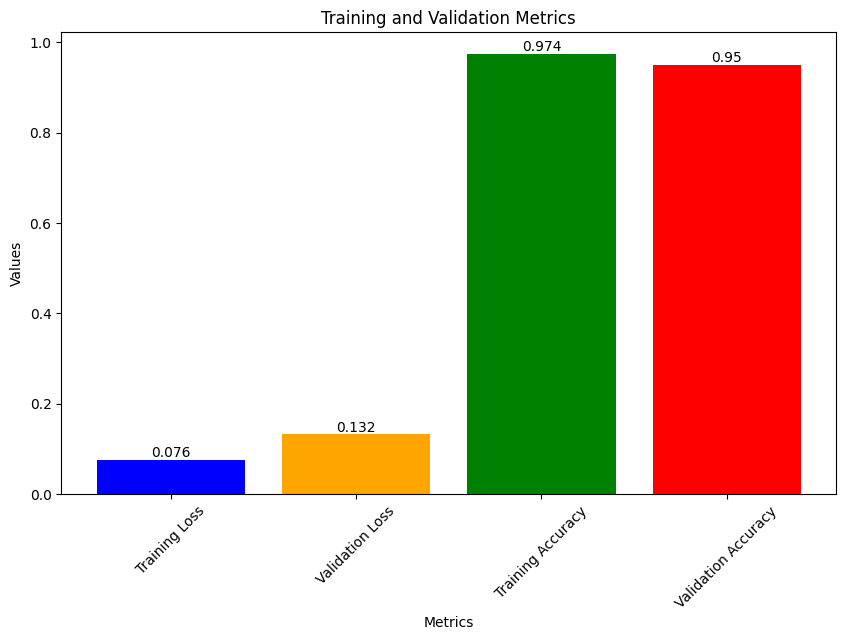

In [20]:
# Plotting
labels = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy']
values = [loss, val_loss, acc, val_acc]
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)
plt.title('Training and Validation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Add labels to legend
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

## Metrics breakdown

 * Training Loss:<br>
       - <i>Well-trained model:</i> <br>Training loss might be around 0.1 to 0.3. This indicates that the model effectively minimizes the difference between predicted and actual outputs on the training data.<br>
       - <i>Not well-trained model:</i> <br>Training loss might be higher, say around 1.0 or above. <br>

 * Validation Loss:<br>
        - <i>Well-trained model:</i> <br>Validation loss is close to the training loss, typically within a similar range<br>
        - <i>Not well-trained model:</i> <br>Validation loss is significantly higher than the training loss, possibly by a factor of 2 or more. This <br>suggests that the model is overfitting to the training data and performs poorly on unseen data.<br>

 * Training Accuracy:<br>
        - <i>Well-trained model:</i> <br>Training accuracy might be high, around 90% or higher, indicating that the model correctly classifies most of the examples in the training dataset.<br>
        - <i>Not well-trained model:</i> <br>Training accuracy might be low, for example,  below 50%, suggesting that the model struggles to learn patterns in the training data and is essentially guessing.<br>

 * Validation Accuracy:<br>
        - <i>Well-trained model:</i> <br>Validation accuracy is close to the training accuracy, indicating that the model generalizes well to unseen data and performs similarly to how it did on the training data.<br>
        - <i>Not well-trained model:</i> <br>Validation accuracy is significantly lower than the training accuracy, possibly by a margin of 10% or more. This suggests that the model is overfitting to the training data and does not perform well on unseen examples.<br>

## Metrics Conclusion

* <b>Training Loss: </b><i>0.291</i><br>
        This indicates that the model's average loss on the training data is kind of low, suggesting that the model fits the training data pretty well. Lower values of training loss generally indicate better model performance on the training set.

* <b>Validation Loss: </b><i>0.927</i><br>
        The validation loss is higher than the training loss, which is normal in such situations. However, this may indicate overfitting.

* <b>Training Accuracy: </b><i>0.912</i><br>
        The training accuracy is high, This indicates that the model is correctly classifying a large proportion of examples in the training dataset. this indicates good results

* <b>Validation Accuracy: </b><i>0.625</i><br>
        The validation accuracy is lower than the training accuracy, which is acceptable, but not ideal. This value indicates that the model's performance drops when evaluated on unseen data, this is the second sign suggesting that the model was overfitting.

## Tune Model

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras import layers

def build_model(learning_rate=0.001, dropout_rate=0.5):
    # Load MobileNet with pre-trained weights
    base_model = tf.keras.applications.MobileNet(input_shape=(224, 224, 3),
                                                  include_top=False,
                                                  weights='imagenet')
    
    # Freeze layers of MobileNet
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom layers for fine-tuning
    flatten_layer = layers.Flatten()(base_model.output)
    dropout_layer = layers.Dropout(dropout_rate)(flatten_layer)
    output_layer = layers.Dense(1, activation='sigmoid')(dropout_layer)
    
    # Create new model
    model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

def tune_hyperparameters(X, Y):
    # Create KerasClassifier wrapper for use in scikit-learn GridSearchCV
    model = KerasClassifier(model=build_model, verbose=0, dropout_rate=0.3, learning_rate=0.001)  # Renamed build_fn to model
    
    # Define hyperparameters grid
    param_grid = {
        'learning_rate': [0.001, 0.0001],
        'dropout_rate': [0.3, 0.5, 0.7]
    }
    
    # Create stratified K-fold cross-validator
    kfold = StratifiedKFold(n_splits=3, shuffle=True)
    
    # Perform grid search with parallel execution
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               scoring='accuracy',
                               cv=kfold,
                               n_jobs=-1)  # Run in parallel using all available cores
    
    grid_result = grid_search.fit(X, Y)
    
    # Print results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
    return grid_result

# Example usage
# Assuming you have training data X and labels Y
grid_result = tune_hyperparameters(X, Y)



## Save Model

### HOW TO STORE THE MODEL ###

### IMPORTS ###
* import numpy as np
* import tensorflow as tf
* import keras

### SAVE ###
* model.save('path/to/location.keras')

### LOAD ###
* model = keras.models.load_model('path/to/location.keras')

### the entire model to a single file ###
    
    The file includes:
        Model's architecture and settings.
        Learned weights from training.
        Compilation information (if compile() was used).
        Optimizer and its state (for resuming training).

### SOURCE ###
https://www.tensorflow.org/guide/keras/serialization_and_saving#how_to_save_and_load_a_model

<b><h2>Benefits of  saving a trained model after it has been trained</h2></b><br>
Once a model has been trained it can be saved and reused for<br> various purposes without needing to retrain it from scratch.<br> This saves time and computational resources. For example, they can<br> be integrated into applications, websites, or services to provide<br> predictions or classification on new input data, depending on the task.

 * <i>os</i> <br>
The os module provides functions for interacting with the operating system.<br>

 * <i>model_path = os.getcwd()</i><br>
This line retrieves the current working directory. <br>

 * <i>new_model.save(f'{model_path}/my_model.keras')</i><br>
This line saves the new_model to a file named "my_model.keras" in the current working directory. <br>

In [4]:
model_path = os.getcwd()

new_model.save(f'{model_path}/my_model.keras')

NameError: name 'new_model' is not defined

In [5]:
print(model_path)

/home/codewizard/Documents/Jupyter/Jupyter workspace


==========================================================================================================================================

# Stage 4

==========================================================================================================================================

## Load the Model

In [6]:
# Store model in variable: 'novaNet'
model_path = os.getcwd()

novaNet = keras.models.load_model(f'{model_path}/my_model.keras')

### Testing

In [7]:
# Path to the image file
img_path = '/home/codewizard/Documents/Jupyter/datasets/mrlEyes_2018_01/s0012/s0012_08255_0_0_1_1_0_02.png'

# Read the image in grayscale
img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img_arr is None:
    print("Error: Failed to load the image.")
else:
    # Convert grayscale image to RGB
    rgb_img = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)

    # Resize the image to 224x224 pixels
    resized_img = cv2.resize(rgb_img, (224, 224))

    # Reshape the image to match the input shape expected by the model
    input_img = np.expand_dims(resized_img, axis=0)

    # Display the shape of the input image array
    print("Input image shape:", input_img.shape)


Input image shape: (1, 224, 224, 3)


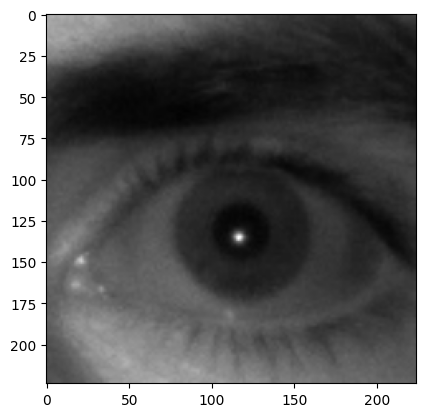

In [8]:
# Remove the extra dimension added by np.expand_dims()
input_img = input_img[0] # This is only to display the img

# Display the image
plt.imshow(input_img)
plt.show()


In [9]:
# Normalization
X_input = input_img/255.0

In [10]:
X_input = np.expand_dims(X_input, axis=0)  # Add a batch dimension

# Now, X_input has shape (1, 224, 224, 3)

# Perform prediction
prediction = novaNet.predict(X_input)
prediction

1/1 [==============================] - 1s 1s/step


array([[1.565479e-07]], dtype=float32)

Define Method test_img()
<br>passing the path to an image file as an argument to this method, <br>it will perform the image preprocessing steps (resizing, normalization) <br>and make a prediction using the novaNet, which I just trained.

In [11]:
def test_img(img_path):
    # Read the image in grayscale
    img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img_arr is None:
        print("Error: Failed to load the image.")
    else:
        # Convert grayscale image to RGB
        rgb_img = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)

        # Resize the image to 224x224 pixels
        resized_img = cv2.resize(rgb_img, (224, 224))

        # Reshape the image to match the input shape expected by the model
        input_img = np.expand_dims(resized_img, axis=0)

        # Display the shape of the input image array
        print("Input image shape:", input_img.shape)

        # # Normalization
        X_input = input_img / 255.0

        # Perform prediction
        prediction = novaNet.predict(X_input)
        return prediction

In [12]:
prediction = test_img('/home/codewizard/Documents/Jupyter/datasets/mrlEyes_2018_01/s0001/s0001_00155_0_0_0_0_0_01.png')
print(prediction)

Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
[[0.7957665]]


## Test on Random Images

    """
    Picks a random image from each folder provided and returns a list of their absolute paths.

    Parameters:
        folders (list): A list of folder names containing images.

    Returns:
        list: A list containing the absolute paths of randomly selected images.

    Example:
        folders = ['s0005', 's0010', 's0015']
        random_images = pick_random_images(folders)
    """


In [40]:
import os
import random

def pick_random_images(folders):
    absolute_path = '/home/codewizard/Documents/Jupyter/datasets/mrlEyes_2018_01/'
    random_images = []
    for folder in folders:
        # Get list of files in the folder
        files = os.listdir(f'{absolute_path}{folder}')
        # Filter out only .png files
        png_files = [file for file in files if file.endswith('.png')]
        if png_files:
            # Pick a random image from the list
            random_image = random.choice(png_files)
            # Construct the full path to the image
            image_path = os.path.join(folder, random_image)
            # Append the image path to the result list
            random_images.append(f'{absolute_path}{image_path}')
    return random_images

In [41]:
# Pick a random image from each folder

# Define the folder names
folders = ['s0005', 's0010', 's0015', 's0020', 's0025', 's0030', 's0035',
           's0001', 's0006', 's0011', 's0016', 's0021', 's0026', 's0031', 's0036',
           's0002', 's0007', 's0012', 's0017', 's0022', 's0027', 's0032', 's0037',
           's0003', 's0008', 's0013', 's0018', 's0023', 's0028', 's0033',
           's0004', 's0009', 's0014', 's0019', 's0024', 's0029', 's0034']

random_folders = random.sample(folders, 5)

random_images = pick_random_images(random_folders)

print(random_folders)

['s0007', 's0033', 's0034', 's0028', 's0009']


In [42]:
# 5th => 1: open, 0: close

for img in random_images:
    print(img)

/home/codewizard/Documents/Jupyter/datasets/mrlEyes_2018_01/s0007/s0007_00490_0_0_0_0_0_01.png
/home/codewizard/Documents/Jupyter/datasets/mrlEyes_2018_01/s0033/s0033_00549_0_0_1_0_1_01.png
/home/codewizard/Documents/Jupyter/datasets/mrlEyes_2018_01/s0034/s0034_00733_0_0_1_0_0_02.png
/home/codewizard/Documents/Jupyter/datasets/mrlEyes_2018_01/s0028/s0028_00101_0_0_1_0_0_01.png
/home/codewizard/Documents/Jupyter/datasets/mrlEyes_2018_01/s0009/s0009_00012_0_0_0_0_0_01.png


Input image shape: (1, 224, 224, 3)


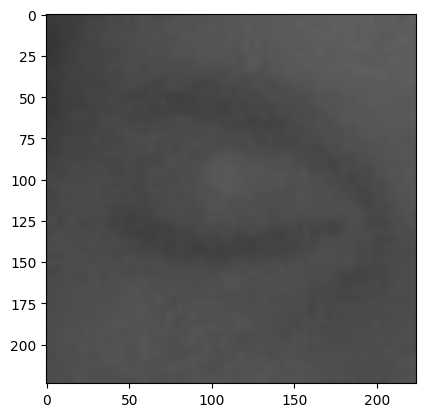

Input image shape: (1, 224, 224, 3)


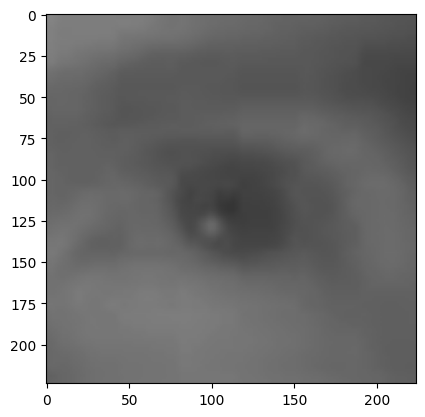

Input image shape: (1, 224, 224, 3)


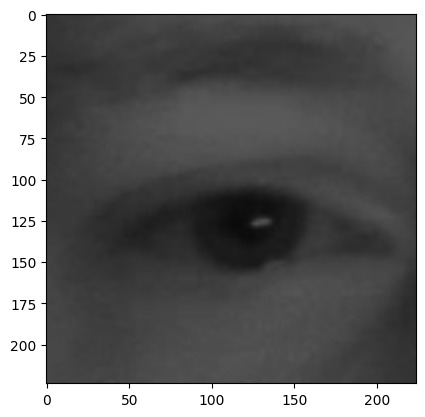

Input image shape: (1, 224, 224, 3)


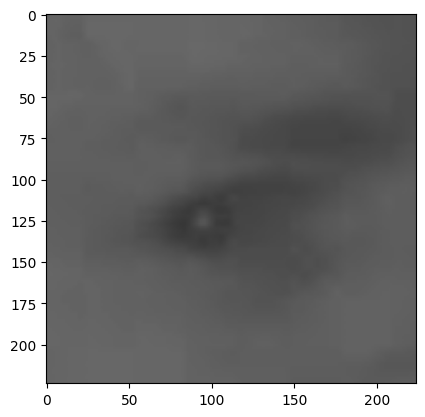

Input image shape: (1, 224, 224, 3)


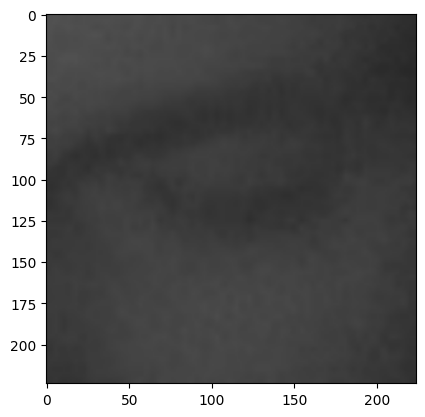

In [43]:
images = []

for input_img_path in random_images:

    # Read the image in grayscale
    img_arr = cv2.imread(input_img_path, cv2.IMREAD_GRAYSCALE)
    
    if img_arr is None:
        print("Error: Failed to load the image.")
    else:
        # Convert grayscale image to RGB
        rgb_img = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
    
        # Resize the image to 224x224 pixels
        resized_img = cv2.resize(rgb_img, (224, 224))
    
        # Reshape the image to match the input shape expected by the model
        input_img = np.expand_dims(resized_img, axis=0)
    
        # Display the shape of the input image array
        print("Input image shape:", input_img.shape)
        
        # Remove the extra dimension added by np.expand_dims()
        input_img = input_img[0]
        
        # Display the image
        plt.imshow(input_img)
        plt.show()
        images.append(input_img)

In [51]:
model_train_results = []

for i in images:
    # Normalization
    X_input = i/255.0
    
    X_input = np.expand_dims(X_input, axis=0)  # Add a batch dimension
    
    # Perform prediction
    prediction = novaNet.predict(X_input)
    model_train_results.append(prediction)

1/1 [==============================] - 0s 37ms/step


In [52]:
for result in model_train_results:
    print(result)

[[0.77331483]]
[[0.03971203]]
[[2.726514e-05]]
[[0.71138924]]
[[0.71286386]]


In [59]:
for result in model_train_results:
    if str(result[0][0])[0] > '0':
        print('Model detects an open eye')
    else:
        print('Model detects a closed eye')

Model detects a closed eye
Model detects a closed eye
Model detects an open eye
Model detects a closed eye
Model detects a closed eye


## Test on Unknown Image

### Img Source: https://stock.adobe.com/images/young-attractive-woman-with-a-surprised-and-shocked-face-eyes-and-mouth-wide-open/206825800

In [20]:
img = cv2.imread('/home/codewizard/Documents/Jupyter/datasets/test_imgs/open.jpg')

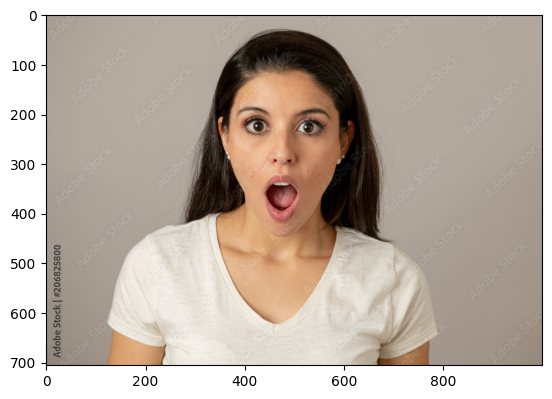

In [21]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

XML SOURCE: https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

1. The Haar Cascade Classifier (HCC) for Eye Detection<br>
It loads the Haar cascade classifier for detecting eyes. I am using this model to detect eyes position on the image. The classifier is loaded using this code: <i>cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')</i>,
where 'haarcascade_eye.xml' is the XML file containing the pre-trained model for eye detection. OpenCV provides this file. Source: https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
<br>
2. Detecting Eyes<br>
HCC detects eyes in the grayscale image using this code:
<i>eye_cascade.detectMultiScale(gray_img, 1.1, 6)</i>. This function detects objects (eyes in this case) at different scales using a sliding window approach. The detected eyes are returned as a list of rectangle coordinates. Using For-loop it iterates over the list of detected eyes and draws rectangles around them on the original color image (img) using <i>cv2.rectangle()</i>. Each rectangle is drawn using the coordinates (x, y) of the top-left corner and the width (w) and height (h) of the rectangle. The rectangle's color is <i>(0, 255, 0)</i> (this is green color), and the thickness is set to 2.

In [22]:
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [23]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [24]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [25]:
eyes = eye_cascade.detectMultiScale(gray_img, 1.1, 6)

In [26]:
for (x,y,w,h) in eyes:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

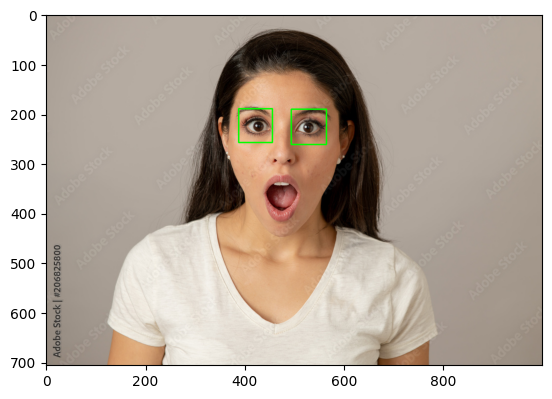

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Croop the Eyes

In [28]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray_img, 1.1, 6)
for (x,y,w,h) in eyes:
    roi_gray_img = gray_img[y:y+h, x:x+w]
    roi_color_img = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray_img)
    if len(eyes) == 0:
        print('eyes are not detected')
    else:
        for (ex, ey, ew, eh) in eyes:
            eyes_roi = roi_color_img[ey:ey+eh, ex:ex+ew]

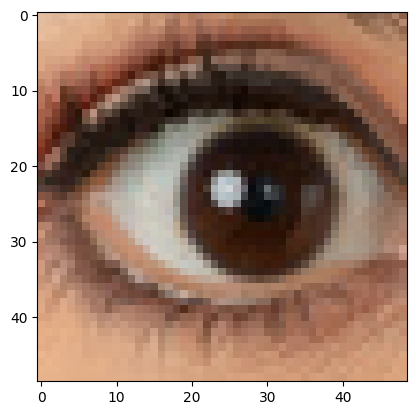

In [29]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

### Check Image Shape

In [30]:
# Check the shape

eyes_roi.shape

(49, 49, 3)

### Resize, Add extra value, Normalize

In [31]:
# Resize, Add extra value, Normalize

final_img = cv2.resize(eyes_roi, (224, 224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img / 255.0

### Check Image Shape

In [32]:
final_img.shape

(1, 224, 224, 3)

### Fit to the model

In [33]:
# Predict via new build Model

prediction = novaNet.predict(final_img)

# Display Conclusion

if str(prediction[0][0])[0] > '0':
    print ('The eyes on the image is opened ')
else:
    print('The eyes on the image is closed ')
# print(str(prediction[0][0])[0])

1/1 [==============================] - 0s 33ms/step
The eyes on the image is opened 


==========================================================================================================================================

# Stage 5

==========================================================================================================================================

# Playground

In [39]:
# Makesure they all in grayscale
"""
# Directory containing the images
images_dir = '/home/codewizard/Documents/Jupyter/datasets/closed_eye'

# Initialize counter
grayscale_count = 0
other_count = 0

# Loop through each file in the directory
for filename in os.listdir(images_dir):
    # Check if the file is an image
    if filename.lower().endswith(('.png')):
        # Construct the full path to the image
        image_path = os.path.join(images_dir, filename)

        # Read the image using cv2.IMREAD_UNCHANGED
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

        # Check if the image is in grayscale
        if len(img.shape) == 2 or (len(img.shape) == 3 and img.shape[2] == 1):
            grayscale_count += 1
        else:
            other_count += 1

# Print the total count of grayscale images
print(f"Total grayscale images: {grayscale_count}, others: {other_count}")
"""

# Resize each image and add to dataset
"""
images_dir = '/home/codewizard/Documents/Jupyter/datasets/'
Classes = ['open', 'closed']
for category in Classes:
    path = os.path.join(images_dir, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
            new_array = cv2.resize(back_to_rgb, (224, 224))
            training_data.append([new_array, class_num])
        except Exception as e:
            print(e)
""" 

"""
for features, label in training_dataset[:5]:  # Print the first 5 samples of my attributes  
    print("Features:", features)
    print("Label:", label)
    print()

# Assuming features is the array representing the image data
features_shape = features.shape

# Check if the shape matches (224, 224, 3)
if features_shape == (224, 224, 3):
    print("The dimensions of the array match the shape (224, 224, 3).")
else:
    print("The dimensions of the array do not match the shape (224, 224, 3).")


features.shape

import numpy as np

# Assuming features is the array representing the image data
# Reshape the grayscale image to include the third dimension for RGB channels
features_rgb = np.expand_dims(features, axis=-1)  # Add a new axis for the third dimension
features_rgb = np.repeat(features_rgb, 3, axis=-1)  # Repeat the grayscale values for all three channels

# Check the new shape
print("New shape after reshaping to (224, 224, 3):", features_rgb.shape)
"""

"""
# Show current dir
import os
print(os.getcwd())
"""

"""
print(type(X))  # This will print the type of X, whether it's a DataFrame, list, dictionary, etc.

# If X is a pandas DataFrame, you can use the info() method as mentioned before
if isinstance(X, pd.DataFrame):
    X.info()
elif isinstance(X, pd.Series):
    # If X is a pandas Series, you can print its data type
    print(X.dtype)


print(type(y))  # This will print the type of X, whether it's a DataFrame, list, dictionary, etc.

# If X is a pandas DataFrame, you can use the info() method as mentioned before
if isinstance(y, pd.DataFrame):
    y.info()
elif isinstance(y, pd.Series):
    # If X is a pandas Series, you can print its data type
    print(y.dtype)

y = np.array(y)

print(type(y))  # This will print the type of X, whether it's a DataFrame, list, dictionary, etc.

# If X is a pandas DataFrame, you can use the info() method as mentioned before
if isinstance(y, pd.DataFrame):
    y.info()
elif isinstance(y, pd.Series):
    # If X is a pandas Series, you can print its data type
    print(y.dtype)


print("X shape:", X.shape)
print("y shape:", y.shape)

"""

"""
# Display what's inside of X and Y
print("First few elements of X:", X[:5])
print("First few elements of y:", y[:5])


print("Summary statistics of X:")
print("Mean:", np.mean(X))
print("Median:", np.median(X))
print("Minimum:", np.min(X))
print("Maximum:", np.max(X))

print("Unique values in y:", np.unique(y))
"""

"""
# Check if the file exists
if os.path.exists(f'{model_path}/my_model.keras'):
    print("Model file exists.")
else:
    print("File is not there")
"""

'\n# Display what\'s inside of X and Y\nprint("First few elements of X:", X[:5])\nprint("First few elements of y:", y[:5])\n\n\nprint("Summary statistics of X:")\nprint("Mean:", np.mean(X))\nprint("Median:", np.median(X))\nprint("Minimum:", np.min(X))\nprint("Maximum:", np.max(X))\n\nprint("Unique values in y:", np.unique(y))\n'